# Welcome to my notebook..

Geospatial Clustering Notebook sample :) 

In [2]:
import numpy as np
import pandas as pd

In [1]:
from matplotlib import gridspec 
from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_target = pd.read_csv('Data_1.csv')

In [5]:
df_target.head()

,Unnamed: 0,id,lat,lon,tags,type
0,0,148680663,47.555612,9.688680,marketplace,node
1,1,240937972,50.965599,7.182943,marketplace,node
2,2,255897613,49.880786,8.660928,marketplace,node
3,3,276043329,53.327598,9.878438,marketplace,node
4,4,293994974,53.093369,8.810666,marketplace,node


In [6]:
df_target.drop(df_target.columns[0], axis=1)

,id,lat,lon,tags,type
0,148680663,47.555612,9.688680,marketplace,node
1,240937972,50.965599,7.182943,marketplace,node
2,255897613,49.880786,8.660928,marketplace,node
3,276043329,53.327598,9.878438,marketplace,node
4,293994974,53.093369,8.810666,marketplace,node
...,...,...,...,...,...
134347,6858753102,53.169617,8.702026,post_office,node
134348,6859841376,49.849712,7.889525,post_office,node
134349,6862942160,49.394662,8.796487,post_office,node
134350,6863015079,49.838985,8.702550,post_office,node


In [7]:
# choose columns
df_target = df_target[['id', 'lat', 'lon','tags']]
df_target.head(10)

,id,lat,lon,tags
0,148680663,47.555612,9.688680,marketplace
1,240937972,50.965599,7.182943,marketplace
2,255897613,49.880786,8.660928,marketplace
3,276043329,53.327598,9.878438,marketplace
4,293994974,53.093369,8.810666,marketplace
5,310254200,53.434488,8.821352,marketplace
6,359885958,50.391747,8.192193,marketplace
7,375779845,50.931824,7.025336,marketplace
8,392491700,53.586377,10.045311,marketplace
9,428178744,53.489726,10.181960,marketplace


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
# Label Encoding the amenity types
labelencoder = LabelEncoder()
labelencoder.fit(df_target.iloc[:,3].values)
df_target.iloc[:,3]=labelencoder.transform(df_target.iloc[:,3])

# Chosing tuned parameters

In [23]:
from sklearn.neighbors import NearestNeighbors

- The optimal value for epsilon will be found at the point of maximum curvature.

In [24]:
# Scaling the data to bring all the attributes to a comparable level 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(df_target) 

# Normalizing the data so that the data 
# approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 

# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

# Renaming the columns 
X_normalized.columns = df_target.columns 

X_normalized.head() 

,id,lat,lon,tags,Clus_Db
0,-0.456721,-0.776466,0.019953,0.008726,-0.433627
1,-0.561133,0.116346,-0.695636,0.016726,-0.432902
2,-0.754902,-0.317871,-0.375203,0.029191,-0.432956
3,-0.474599,0.770090,0.065155,0.012449,-0.421091
4,-0.490136,0.731954,-0.208850,0.013626,-0.424506


In [14]:
df_target=X_normalized

In [15]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_target)
distances, indices = nbrs.kneighbors(df_target)

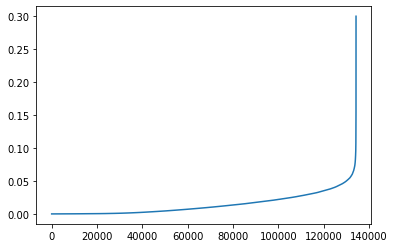

In [16]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [21]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_target
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.05, min_samples=3).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_target['Clus_Db']=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

# A sample of clusters
print(df_target[['Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Clus_Db
0       -1
1       -1
2       -1
3       -1
4       -1
number of labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,

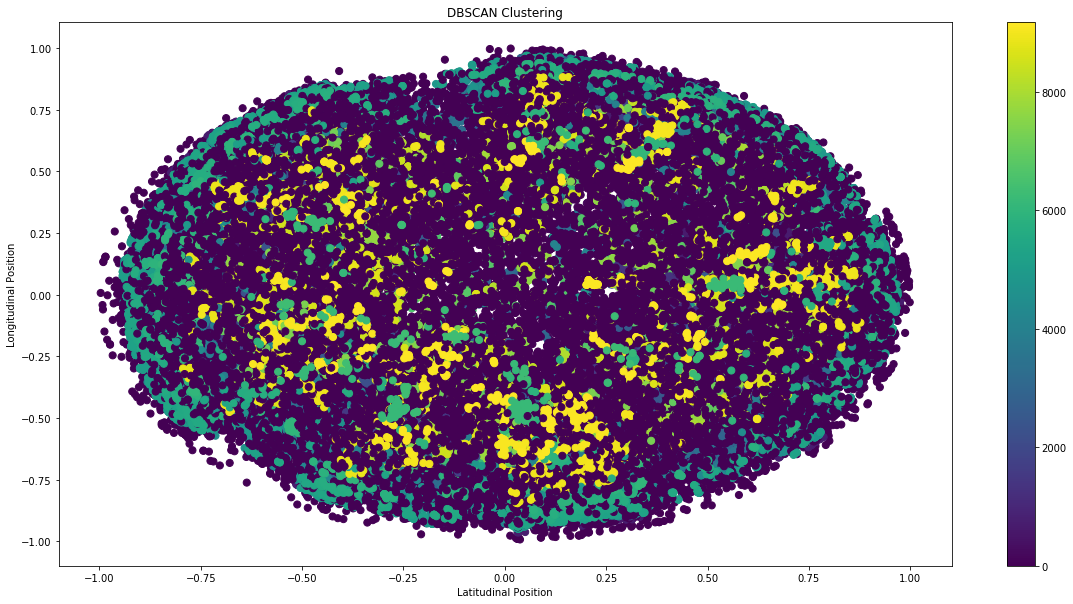

In [22]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(df_target['lat'],df_target['lon'],
                     c=labels,s=50)
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Latitudinal Position')
ax.set_ylabel('Longitudinal Position')
plt.colorbar(scatter)

In [70]:
ans = labelencoder.inverse_transform(labels)

In [71]:
ans

array(['bank', 'bank', 'bank', ..., 'post_office', 'post_office',
       'post_office'], dtype=object)

In [72]:
final_df=pd.DataFrame({'id':df_target['id'].values,'lat':df_target['lat'].values,'lon':df_target['lon'].values,'tags':df_target['tags'].values,'cluster':ans})

In [73]:
final_df.head()

,id,lat,lon,tags,cluster
0,148680663,47.555612,9.688680,3,bank
1,240937972,50.965599,7.182943,3,bank
2,255897613,49.880786,8.660928,3,bank
3,276043329,53.327598,9.878438,3,bank
4,293994974,53.093369,8.810666,3,bank


In [56]:
# Clustering on Lat+Lon+Tag